In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
hdf <- read_csv('./data/hdf.csv')
cvdf <- read_csv('./data/cvdf.csv')

Rows: 1200 Columns: 6

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): histogram, xs, widths, n, N1, i


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 2413 Columns: 8

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): density, density2, xs, samples, est, n, N1, i


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [17]:
# filter out some stuff I dont want in the plot
cvdf = (cvdf %>% filter(! i %in% c(3,4)))
cvdf = (cvdf %>% filter(! n %in% c(97)))
cvdf = (cvdf %>% filter(! N1 %in% c(7,17,18)))

hdf = (hdf %>% filter(! i %in% c(3,4)))
hdf = (hdf %>% filter(! n %in% c(97,7)))
hdf = (hdf %>% filter(! N1 %in% c(7,17,18)))


sampdf = (cvdf %>%
  group_by(N1,n) %>%
  filter(row_number() <= 5))

In [21]:
library(repr)
## set figure size
f = 2.5
width=3*f
height=3*f
options(repr.plot.width=width, repr.plot.height=height)

In [22]:
myplot = (ggplot(cvdf)
      + facet_wrap(nrow = 6, ncol =2, facets = vars(n, N1), scales='free', labeller=label_both)
      + geom_col(data=hdf, 
                 mapping=aes(x=xs, y=histogram, fill='actual R(n+1)', width=widths), alpha=0.4)
      + geom_line(data=cvdf, 
                  mapping=aes(x=xs, y=density2, color='Gamma(N1+.1,n+1)'), size=1)
      + geom_vline(data=cvdf, mapping=aes(xintercept = est, linetype='point estimate'), size=.2)
      + geom_vline(data=sampdf, mapping=aes(xintercept = samples, linetype='Thompson samples'), size=.2)
      + xlab('R(n+1)')
      + ylab(element_blank())
      + labs(title = 'Estimates, real values and Thompson sampling')
      + theme(plot.title=element_text(hjust = .5, size=15),
                legend.title=element_blank(),
                panel.grid.major.x = element_blank() ,
                strip.text=element_text(size=10),
                legend.margin=margin(), #margin(t=0, b=0),
                legend.box.margin=margin(0,0,0,0),
                axis.ticks.y=element_blank(),
                axis.text.y=element_blank(), #element_text(size=12),
                axis.text.x=element_text(size=10, angle=0, hjust = 1, vjust=.5),
                legend.text=element_text(size=12),
                legend.position="bottom")
      + guides(fill=guide_legend(nrow=2,byrow=TRUE)))

Warning message:
“Ignoring unknown aesthetics: width”


Warning message:
“position_stack requires non-overlapping x intervals”


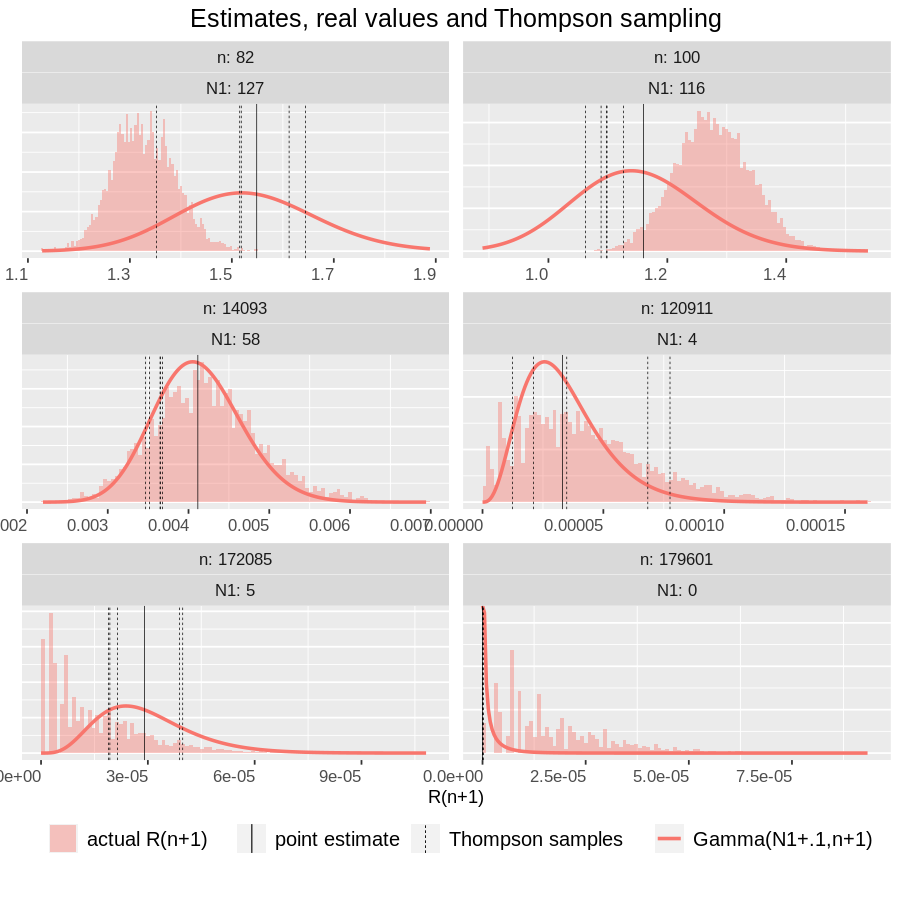

In [23]:
myplot

In [25]:
# save pdf
ggsave(file='./assets/estimates.pdf', units='in')

Saving 6.67 x 6.67 in image

Warning message:
“position_stack requires non-overlapping x intervals”
